**Click on File and save a copy in Drive.**

### **Aim**  
The goal of this assignment is to make predictions using linear regression. We will be implementing the linear regression model from scratch. We have been provided with a hypothetical dataset of a company that wants to predict the price of a car. Our task is to build a linear regression model that can accurately predict the price of a car based on the given features in dataset.                                  
**NOTE:** Data is hypothetical price of the car may be negative.

Import Libraries.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

### Generating the dataset  
Run the cell below to load the dataset. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
!gdown --id 1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO
To: /content/car_dataa.csv
100% 34.2k/34.2k [00:00<00:00, 24.3MB/s]


In [5]:
df=pd.read_csv('/content/car_dataa.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,-0.860155,-94.188683,-0.410123,0.612850,Petrol,Dealer,Manual,0
1,sx4,-0.097043,15.276170,0.647960,-1.874549,Diesel,Dealer,Manual,0
2,ciaz,-0.402870,69.755387,0.457906,2.125322,Petrol,Dealer,Manual,0
3,wagon r,-0.480849,-61.144535,-0.079979,0.038635,Petrol,Dealer,Manual,0
4,swift,-2.223520,-40.620491,1.898574,-0.468699,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,1.007247,20.693798,-1.083003,-0.229690,Diesel,Dealer,Manual,0
297,brio,1.721243,87.938514,-0.859128,0.378223,Petrol,Dealer,Manual,0
298,city,-0.171465,-154.588890,-0.944369,-0.495819,Petrol,Dealer,Manual,0
299,city,-0.605274,171.969714,2.360360,-0.057051,Diesel,Dealer,Manual,0


Delete Unwanted Columns like Car_Name, Fuel_Type, Seller_Type, Owner, Transmission. Use del function:- del df['Car_Name'] deletes that column.

In [6]:
del df['Transmission']
del df['Car_Name']
del df['Fuel_Type']
del df['Seller_Type']
del df['Owner']

In [7]:
df

,Year,Selling_Price,Present_Price,Kms_Driven
0,-0.860155,-94.188683,-0.410123,0.612850
1,-0.097043,15.276170,0.647960,-1.874549
2,-0.402870,69.755387,0.457906,2.125322
3,-0.480849,-61.144535,-0.079979,0.038635
4,-2.223520,-40.620491,1.898574,-0.468699
...,...,...,...,...
296,1.007247,20.693798,-1.083003,-0.229690
297,1.721243,87.938514,-0.859128,0.378223
298,-0.171465,-154.588890,-0.944369,-0.495819
299,-0.605274,171.969714,2.360360,-0.057051


Take out Selling price as y and other column as X

In [8]:
y=df[['Selling_Price']]
y=np.array(y)
X=df[['Year','Present_Price','Kms_Driven']]
X=np.array(X)

In [9]:
#Check the shape of X
X.shape

(301, 3)

In [10]:
#Check the shape of y
y.shape

(301, 1)

In [11]:
#print X and check
print(X[:5,:])


[[-0.860155   -0.41012273  0.61284992]
 [-0.09704295  0.64796008 -1.87454934]
 [-0.40286978  0.45790622  2.12532215]
 [-0.48084914 -0.07997949  0.03863521]
 [-2.22351957  1.89857356 -0.46869942]]


In [12]:
# print y and check
print(y[:5,:])

[[-94.1886835 ]
 [ 15.27616998]
 [ 69.75538672]
 [-61.14453516]
 [-40.62049081]]


In [13]:
#Divide data into train and test using train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [14]:
#find shape of X
print(X_train.shape)
print(X_test.shape)


(240, 3)
(61, 3)


In [15]:
#find shape of X
print(y_train.shape)
print(y_test.shape)


(240, 1)
(61, 1)


### Visualizing the data  
Use `matplotlib` to visualize the given data.

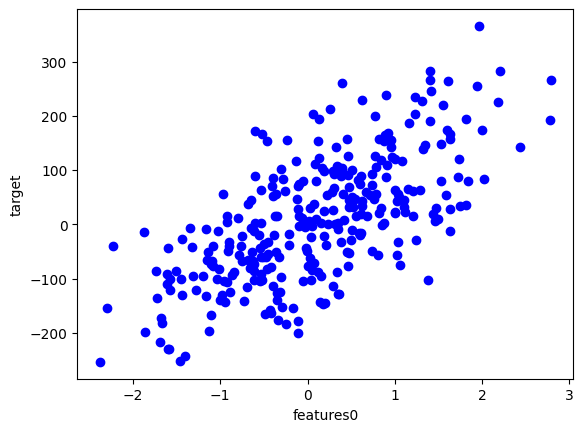

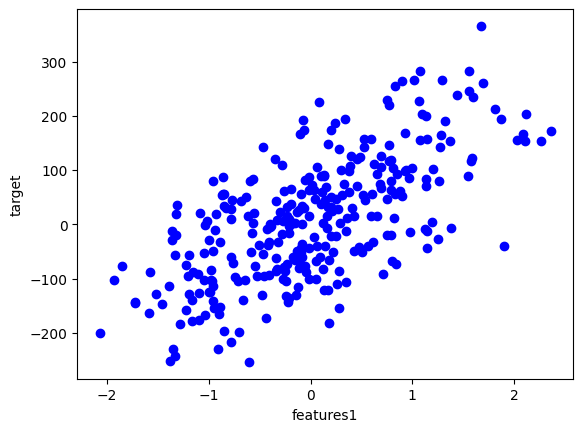

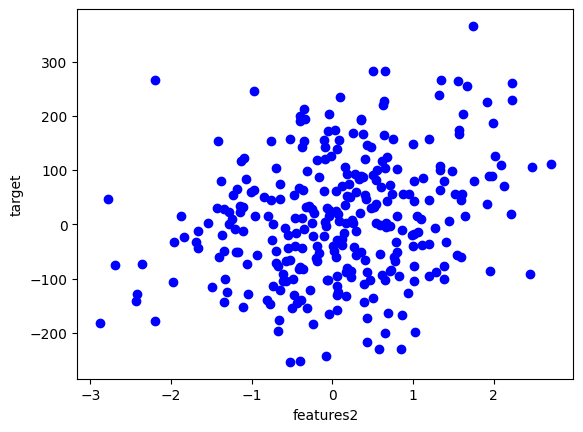

In [16]:
import matplotlib.pyplot as plt


# Your code here
for i in range(3):
  plt.scatter(X[:,i],y,c="blue")
  plt.xlabel("features"+str(i))
  plt.ylabel("target")
  plt.show()

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [29]:

import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr=learning_rate
        self.n_iters=n_iters

    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        
        
        # init parameters
        self.weights =np.array([50,100,100])
        self.bias =10
        m,n=X.shape
        # gradient descent
    

        dj_dw=np.zeros(n)
        dj_db=0
        for k in range(self.n_iters):
          for i in range(m):
            for j in range(n):
              dj_dw[j]+=(np.dot(self.weights,X[i])+self.bias-y[i])*X[i,j]
            dj_db+=(np.dot(self.weights,X[i])+self.bias)-y[i]
          dj_dw=dj_dw/m
          dj_db=dj_db/m
          self.weights=self.weights-(self.lr*dj_dw)
          self.bias=self.bias-(self.lr*dj_db)
        print(self.weights)
        print(self.bias)



        




        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
      m,n=X.shape
      y_approximated=np.zeros(m)
      for u in range(m):
        y_approximated =np.dot(self.weights,X[i])+self.bias
      return y_approximated

### Initializing, Training & Predictions

In [31]:
# Now, we make an object of our custom class.
regressor = LinearRegression(learning_rate=0.01, n_iters=1000) # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)

# Now, let's see our what our model predicts # pass appropriate part of dataset
Y_pred=regressor.predict(X_test)

 

[78.85272483 89.04435563 24.37685604]
[-0.52988294]


### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [39]:
def mean_squared_error(y_true, y_pred):

    cf=np.sum((y_pred-y_true)**2)
    m=len(y_true)
    cf=cf/(2*m)
    return cf


       

def r2_score(y_true, y_pred):
    m=np.mean(y_true)
    num=(y_true-y_pred)**2
    den=(y_true-m)**2
    score=(np.sum(num))/(np.sum(den))
    score=1-score
    return score
        
    # return the r2 score
       
          

mse = mean_squared_error(y_test, Y_pred)
print("MSE:", mse)

accu = r2_score(y_test, Y_pred)
print("Accuracy:", accu)

MSE: 8039.444103550656
Accuracy: 98.1879955278999 %


In [ ]:
#Print first 10 values of prediction and y_test


[Please click on this link to access subjective questions](https://docs.google.com/document/d/1wgM6qO6w1QQbcC74Wt58wlScT8uUa9U5rLdDNT99FXE/edit?usp=sharing)